## Homework 1 Clustering and Regression

### Instructions

Answer the questions and upload your answers to courseville. Answers can be in Thai or English. Answers can be either typed or handwrittern and scanned. the assignment is diveided into several small tasks. Each task is weighted equally(marked with **T**). For this assignment, each task is awared 1 points. There are also optional taks(marked with **OT**) counts for 0.5 points each.

### Metrics

In a population where the amount of cats is equal to the amount of dogs. Considering the following classification results from a classifier.

| Model A    | Predicted dog | Predicted cat |
|------------|---------------|---------------|
| Actual dog | 30            | 20            |
| Actual cat | 10            | 40            |

**T1.** What is the accuracy of Model A?

In [1]:
correct_predictions = 30 + 40
total_predictions = 30 + 20 + 10 + 40
accuracy = correct_predictions / total_predictions
print(f"Accuracy of Model A is {accuracy}")

Accuracy of Model A is 0.7


**T2.** Consider cats as 'class 1' (positive) and dogs as 'class 0' (negative) calculate the precision, recall, and F1.

In [2]:
tp = 40
fp = 20
fn = 10
tn = 30

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision of Model A is {precision}")
print(f"Recall of Model A is {recall}")
print(f"F1 of Model A is {f1}")

Precision of Model A is 0.6666666666666666
Recall of Model A is 0.8
F1 of Model A is 0.7272727272727272


**T3.** Consider class cat as ‘class 0’ and class dog as ‘class 1’, calculate the
precision, recall, and F1.

It is important to specify the ‘positive’ class when you calculate precision,
recall, and F1. If there are more than two classes, it is usually done in a one-
versus-all setting where one class is considered positive and the rest of the classes
are considered negative.

In [3]:
tp = 30
fp = 10
fn = 20
tn = 40

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

print(f"Precision of Model A is {precision}")
print(f"Recall of Model A is {recall}")
print(f"F1 of Model A is {f1}")
print(f"Accuracy of Model A is {accuracy}")

Precision of Model A is 0.75
Recall of Model A is 0.6
F1 of Model A is 0.6666666666666665
Accuracy of Model A is 0.7


**T4.** Now consider a lopsided population where there are 80% cats. What is
the accuracy of Model A? Using dog as the positive class, what is the precision,
recall, and F1? Explain how and why these numbers change (or does not change)
from the previous questions

In [4]:
# change ration abrove from 50/50 to 80/20
pos_multiplier = 20 / 50
neg_multiplier = 80 / 50
tp = 30 * pos_multiplier
fp = 10 * neg_multiplier
fn = 20 * pos_multiplier
tn = 40 * neg_multiplier

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"Precision of Model A is {precision}")
print(f"Recall of Model A is {recall}")
print(f"F1 of Model A is {f1}")
print(f"Accuracy of Model A is {accuracy}")


Precision of Model A is 0.42857142857142855
Recall of Model A is 0.6
F1 of Model A is 0.5
Accuracy of Model A is 0.76


Precision of Model A is decrease from 0.75 to ~0.43 due to the number of true positive (actual dog/predict dog) is decrease and the number of false positive (actual cat/predict dog) is increased

Recall of Model A is equal because recall calcuate from true positive divided by true posive plus false negative and ratio of true positive over false negative does not change

F1 of Model A is decrease from ~0.67 to 0.5 because precision is decrease due to the equaltion

Accuracy of Model A is increase from 0.7 to 0.76 because ration of true positive plus true negative over total prediction increase

**OT1.** Consider the equations for accuracy and F1

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$
$$F1 = \frac{2TP}{2TP+FP+FN}$$

When will accuracy be equal, greater, or less than F1?

equal: When the number of True positive (TP) and True negative (TN) are equal TP = TN

greater: When number of True negative (TN) greater than True positive (TP) TN > TP

less: When number of True negative (TN) less than True positive (TP) TN < TP

### Hello Clustering

Recall from lecture that K-means has to main steps: the points assignment step, and the mean update step. After the initialization of the centroids, we assign each data point to a centroid. Then, centroids are updated by re-estimating the means.

Concretely, if we are given N data points, $x_1, x_2, ..., x_N$, and we would like to from K clusters. We do the following;

1. **Initialization**: Pick K random data points as K centroid locations $c_1, c_2, ..., c_K$.
2. **Assign:** For each data point k, find the closest centroid. Assign that data point to the centroid. The distance used is typically Euclidean distance.
3. **Updater:** For each centroid, calculate the mean from the data points assigned to it.
4. **Repeat:** repeat step 2 and 3 until the centroids stop changing (convergence).

Given the following data points in x-y coordinates (2 dimensional)

|x  |y  |
|---|---|
|1  |2  |
|3  |3  |
|2  |2  |
|8  |8  |
|6  |6  |
|7  |7  |
|-3 |-3 |
|-2 |-4 |
|-7 |-7 |

In [5]:
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

points = [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7, -7)]

def k_means(centroids, points, show=True):
    previous_centroids = centroids.copy()
    iterations = 0

    while True:
        iterations += 1
        if show:
            print(f"\nIteration {iterations}")
        
        # Assign each point to the closest starting point
        clusters = {point: [] for point in centroids}
        for point in points:
            closest_point = min(centroids, key=lambda x: euclidean_distance(x, point))
            clusters[closest_point].append(point)
        
        if show:
            for i, cluster in enumerate(clusters):
                print(f"Cluster {i}: {cluster} has {len(clusters[cluster])} points: {clusters[cluster]}")

        # Update the new centroid for each cluster
        for i, centroid in enumerate(clusters):
            x = sum(point[0] for point in clusters[centroid]) / len(clusters[centroid])
            y = sum(point[1] for point in clusters[centroid]) / len(clusters[centroid])
            if show:
                print(f"New centroid for cluster {centroid} is ({x}, {y})")
            previous_centroids[i] = centroids[i]
            centroids[i] = (x, y)
        
        # Check if the centroids have changed
        if previous_centroids == centroids:
            sum_squared_distance = 0
            for centroid in clusters:
                for point in clusters[centroid]:
                    sum_squared_distance += euclidean_distance(centroid, point) ** 2
            if show:
                print("Converged")
                print(f"Sum squared distance of points to their closest centroid: {sum_squared_distance}")
            return sum_squared_distance

**T5.** If the starting points are (3,3), (2,2), and (-3, -3). Describe each assign and update step. What are the points assigned? What are the updated centroids? You may do the calculation by hand or write a program to do it.

In [6]:
centroids = [(3, 3), (2, 2), (-3, -3)]
ssd = k_means(centroids, points)


Iteration 1
Cluster 0: (3, 3) has 4 points: [(3, 3), (8, 8), (6, 6), (7, 7)]
Cluster 1: (2, 2) has 2 points: [(1, 2), (2, 2)]
Cluster 2: (-3, -3) has 3 points: [(-3, -3), (-2, -4), (-7, -7)]
New centroid for cluster (3, 3) is (6.0, 6.0)
New centroid for cluster (2, 2) is (1.5, 2.0)
New centroid for cluster (-3, -3) is (-4.0, -4.666666666666667)

Iteration 2
Cluster 0: (6.0, 6.0) has 3 points: [(8, 8), (6, 6), (7, 7)]
Cluster 1: (1.5, 2.0) has 3 points: [(1, 2), (3, 3), (2, 2)]
Cluster 2: (-4.0, -4.666666666666667) has 3 points: [(-3, -3), (-2, -4), (-7, -7)]
New centroid for cluster (6.0, 6.0) is (7.0, 7.0)
New centroid for cluster (1.5, 2.0) is (2.0, 2.3333333333333335)
New centroid for cluster (-4.0, -4.666666666666667) is (-4.0, -4.666666666666667)

Iteration 3
Cluster 0: (7.0, 7.0) has 3 points: [(8, 8), (6, 6), (7, 7)]
Cluster 1: (2.0, 2.3333333333333335) has 3 points: [(1, 2), (3, 3), (2, 2)]
Cluster 2: (-4.0, -4.666666666666667) has 3 points: [(-3, -3), (-2, -4), (-7, -7)]
New 

**T6.** If the starting points are (-3,-3), (2,2), and (-7, -7). what happens?

In [7]:
centroids = [(-3, -3), (2, 2), (-7, -7)]
ssd = k_means(centroids, points)


Iteration 1
Cluster 0: (-3, -3) has 2 points: [(-3, -3), (-2, -4)]
Cluster 1: (2, 2) has 6 points: [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)]
Cluster 2: (-7, -7) has 1 points: [(-7, -7)]
New centroid for cluster (-3, -3) is (-2.5, -3.5)
New centroid for cluster (2, 2) is (4.5, 4.666666666666667)
New centroid for cluster (-7, -7) is (-7.0, -7.0)

Iteration 2
Cluster 0: (-2.5, -3.5) has 2 points: [(-3, -3), (-2, -4)]
Cluster 1: (4.5, 4.666666666666667) has 6 points: [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)]
Cluster 2: (-7.0, -7.0) has 1 points: [(-7, -7)]
New centroid for cluster (-2.5, -3.5) is (-2.5, -3.5)
New centroid for cluster (4.5, 4.666666666666667) is (4.5, 4.666666666666667)
New centroid for cluster (-7.0, -7.0) is (-7.0, -7.0)
Converged
Sum squared distance of points to their closest centroid: 77.83333333333333


Different initial cluster centroids give different final result

**T7.** Between the two starting set of points in the previous two questions,
which one do you think is better? How would you measure the ‘goodness’ quality
of a set of starting points?

In general, it is important to try different sets of starting points when doing
k-means.

First stating set of points is better. Because if we measure with sum squared distance between points and it's cluster then first starting set of points return SSD less than second starting set of points that relate to our goal of k-means.

**OT2.** What would be the best K for this question? Describe your reasoning.

In [8]:
import random
import matplotlib.pyplot as plt

k_mean_ssd = []
for k in range(1, 9):
    mean_ssd = 0
    for n in range(5):
        centroids = random.sample(points, k)
        ssd = k_means(centroids, points, show=False)
        mean_ssd += ssd
    print(f"Mean SSD for k={k}: {mean_ssd / 5}")
    k_mean_ssd.append(mean_ssd / 5)

Mean SSD for k=1: 418.2222222222222
Mean SSD for k=2: 116.02000000000001
Mean SSD for k=3: 29.333333333333325
Mean SSD for k=4: 22.766666666666666
Mean SSD for k=5: 8.666666666666666
Mean SSD for k=6: 7.7
Mean SSD for k=7: 6.166666666666666
Mean SSD for k=8: 0.9000000000000001


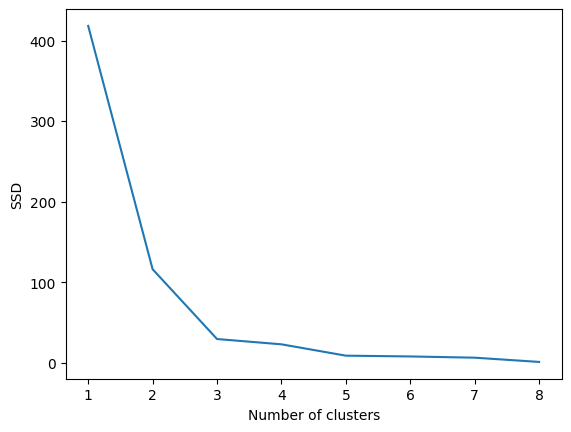

In [9]:
plt.plot(range(1, 9), k_mean_ssd)
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

3 would be the best K for this question. Becasue if we use elbow method to select K and the elbow point where the rate of decrease in SSD slows down. In this case, K=3 seems to be the best choice as it provides a substantial reduction in the sum of squared distances while keeping the clustering solution simple. 

### My heart will go on

In this part of the exercise we will work on the Titanic dataset provided by
Kaggle. The Titanic dataset contains information of the passengers boarding
the Titanic on its final voyage. We will work on predicting whether a given
passenger will survive the trip.

Let’s launch Jupyter and start coding!

We start by importing the data using Pandas

In [10]:
import pandas as pd
import numpy as np

/tmp/ipykernel_27050/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

Both train and test are dataframes. Use the function train.head() and
train.tail() to explore the data. What do you see?

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Use the function describe() to get a better understanding of the data.
You can read the meaning of the data fields at https://www.kaggle.com/c/titanic/data

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at the data, you will notice a lot of missing values. For example,
some age is NaN. This is normal for real world data to have some missing values.
There are several ways to handle missing values. The simplest is to throw away
any rows that have missing values. However, this usually reduce the amount
of training data you have. Another method is to guess what the missing value
should be. The simplest guess is to use the Median or Mode of the data. For
this exercise we will proceed with this

**T8.** What is the median age of the training set? You can easily modify
the age in the dataframe by

`train["Age"] = train["Age"].fillna(train["Age"].median())`

Note that you need to modify the code above a bit to fill with mode() because
mode() returns a series rather than a single value.

In [15]:
print("The median age of the training set before fill null is", train["Age"].median())

# Fill missing values with the mode
mode_age_train = train["Age"].mode()[0]
train["Age"] = train["Age"].fillna(mode_age_train)
print("The median age of the training set after fill null is", train["Age"].median())

The median age of the training set before fill null is 28.0
The median age of the training set after fill null is 24.0


**T9.** Some fields like ‘Embarked’ are categorical. They need to be converted
to numbers first. We will represent S with 0, C with 1, and Q with 2. What is
the mode of Embarked? Fill the missing values with the mode. You can set the
value of Embarked easily with the following command.

`train.loc[train["Embarked"] == "S", "Embarked"] = 0`

In [16]:
mode_embarked_train = train["Embarked"].mode()[0]
print("The mode Embarked of the training set is", mode_embarked_train)

# Fill missing values with the mode
train["Embarked"] = train["Embarked"].fillna(mode_embarked_train)

# Convert the Embarked classes to number
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

The mode Embarked of the training set is S


Do the same for Sex.

In [17]:
mode_sex_train = train["Sex"].mode()[0]

print("The mode Sex of the training set is", mode_sex_train)

# Fill missing values with the mode
train["Sex"] = train["Sex"].fillna(mode_sex_train)

# Convert the Sex classes to number
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

The mode Sex of the training set is male


**T10.** Write a logistic regression classifier using gradient descent as learned
in class. Use PClass, Sex, Age, and Embarked as input features. You can
extract the features from Pandas to Numpy by

`data = np.array(train[["PClass","Sex","Age","Embarked"]].values)`

Check the datatype of each values in data, does it make sense? You can
force the data to be of any datatype by using the command

`data = np.array(train[["PClass","Sex","Age","Embarked"]].values, dtype = float)`

When you evaluate the trained model on the test set, you will need to make
a final decision. Since logistic regression outputs a score between 0 and 1, you
will need to decide whether a score of 0.3 (or any other number) means the
passenger survive or not. For now, we will say if the score is greater than or
equal to 0.5, the passenger survives. If the score is lower than 0.5 the passenger
will be dead. This process is often called ‘Thresholding.’ We will talk more
about this process later in class.

To evaluate your results, we will use Kaggle. Kaggle is a website that hosts
many machine learning competitions. Many companies put up their data as a
problem for anyone to participate. If you are looking for a task for your course
project, Kaggle might be a good place to start. You will need to make sure that
your output is in line with the submission requirements of Kaggle: a csv file
with exactly 418 entries and two columns: PassengerId and Survived. Then, use the code provided to make a new data frame using DataFrame(), and create
a csv file using to csv() method from Pandas.

To submit your prediction, you must first sign-up for an account on Kaggle.
com. Click participate to the competition at https://www.kaggle.com/c/titanic/ then submit your csv file for the score.
The output file should have two columns: the passengerId and a 0,1 decision
(0 for dead, 1 for survive). As shown below:

PassengerId,Survived\
892,0\
893,1\
894,0

In [18]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
labels = np.array(train["Survived"].values, dtype = float)

In [19]:
class LogisticRegression:
    def __init__(self, lr=0.005) -> None:
        self.weights = None
        self.lr = lr

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y, n_iters):
        self.weights = np.zeros(X.shape[1])
        for _ in range(n_iters):
            y_pred = self.sigmoid(np.dot(X, self.weights))
            dw = 1 / X.shape[0] * np.dot(X.T, (y_pred - y))
            self.weights -= self.lr * dw

    def predict(self, X, threshold=0.5):
        pred = self.sigmoid(np.dot(X, self.weights))
        return (pred > threshold).astype(int)

In [20]:
classifier = LogisticRegression()
classifier.fit(data, labels, 1000)

In [21]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

y_pred = classifier.predict(data, 0.4)
print(f"Accuracy of the model with 0.4 threshold is {accuracy(labels, y_pred)}")

y_pred = classifier.predict(data, 0.5)
print(f"Accuracy of the model with 0.5 threshold is {accuracy(labels, y_pred)}")

y_pred = classifier.predict(data, 0.6)
print(f"Accuracy of the model with 0.6 threshold is {accuracy(labels, y_pred)}")


Accuracy of the model with 0.4 threshold is 0.7755331088664422
Accuracy of the model with 0.5 threshold is 0.7171717171717171
Accuracy of the model with 0.6 threshold is 0.6172839506172839


In [22]:
test["Age"] = test["Age"].fillna(mode_age_train)

test["Embarked"] = test["Embarked"].fillna(mode_embarked_train)
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

test["Sex"] = test["Sex"].fillna(mode_sex_train)
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

X_test = np.array(test[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
y_pred = classifier.predict(X_test, 0.4)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred
})
submission.to_csv("submission_all_feat.csv", index=False)

**T11.** Submit a screenshot of your submission (with the scores). Upload
your code to courseville.

![T11 Submission](./images/screencapture-kaggle-competitions-titanic-submissions-2024-02-19-15_14_17.png "T11 Submission")

**T12.** Try adding some higher order features to your training ($x_1^2, x_1x_2,...$).
Does this model has better **accuracy on the training set?** How does it
perform on the **test set**?

In [23]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
labels = np.array(train["Survived"].values, dtype = float)

# add x_1^2
data = np.c_[ data, data[:, 0]**2]

# add x_1*x_2
data = np.c_[ data, data[:, 0]*data[:, 1]]

# add x_2*x_3
data = np.c_[ data, data[:, 1]*data[:, 2]]

# add x_4^2
data = np.c_[ data, data[:, 3]**2]

classifier = LogisticRegression()
classifier.fit(data, labels, 1000)

In [24]:
# Perform on training set

y_pred = classifier.predict(data, 0.4)
print(f"Accuracy of the model with 0.4 threshold is {accuracy(labels, y_pred)}")

y_pred = classifier.predict(data, 0.5)
print(f"Accuracy of the model with 0.5 threshold is {accuracy(labels, y_pred)}")

y_pred = classifier.predict(data, 0.6)
print(f"Accuracy of the model with 0.6 threshold is {accuracy(labels, y_pred)}")


Accuracy of the model with 0.4 threshold is 0.7912457912457912
Accuracy of the model with 0.5 threshold is 0.7811447811447811
Accuracy of the model with 0.6 threshold is 0.7822671156004489


In [25]:
X_test = np.array(test[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

# add x_1^2
X_test = np.c_[ X_test, X_test[:, 0]**2]

# add x_1*x_2
X_test = np.c_[ X_test, X_test[:, 0]*X_test[:, 1]]

# add x_2*x_3
X_test = np.c_[ X_test, X_test[:, 1]*X_test[:, 2]]

# add x_4^2
X_test = np.c_[ X_test, X_test[:, 3]**2]

y_pred = classifier.predict(X_test, 0.4)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred
})
submission.to_csv("submission_higher_order.csv", index=False)

![T12 Submission](./images/screencapture-kaggle-competitions-titanic-submissions-2024-02-19-15_26_05.png "T12 Submission")

**T13.** What happens if you reduce the amount of features to just Sex and
Age?

In [26]:
data = np.array(train[["Sex","Age"]].values, dtype = float)

classifier = LogisticRegression()
classifier.fit(data, labels, 1000)

In [27]:
# Perform on training set

y_pred = classifier.predict(data, 0.4)
print(f"Accuracy of the model with 0.4 threshold is {accuracy(labels, y_pred)}")

y_pred = classifier.predict(data, 0.5)
print(f"Accuracy of the model with 0.5 threshold is {accuracy(labels, y_pred)}")

y_pred = classifier.predict(data, 0.6)
print(f"Accuracy of the model with 0.6 threshold is {accuracy(labels, y_pred)}")


Accuracy of the model with 0.4 threshold is 0.7205387205387206
Accuracy of the model with 0.5 threshold is 0.6958473625140292
Accuracy of the model with 0.6 threshold is 0.6285072951739619


In [28]:
X_test = np.array(test[["Sex","Age"]].values, dtype = float)
y_pred = classifier.predict(X_test, 0.4)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred
})
submission.to_csv("submission_sex_age.csv", index=False)

![T13 Submission](./images/screencapture-kaggle-competitions-titanic-submissions-2024-02-19-15_29_17.png "T13 Submission")

The model performance perform worse than 4 feature both training and testing evaluation.

**OT3.** We want to show that matrix inversion yields the same answer
as the gradient descent method. However, there is no closed form solution for
logistic regression. Thus, we will use normal linear regression instead. Re-do
the Titanic task as a regression problem by using linear regression. Use the
gradient descent method.

In [29]:
class LinearRegression:
    def __init__(self, lr=0.001) -> None:
        self.weights = None
        self.lr = lr
    
    def fit(self, X, y, n_iters):
        X = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.zeros(X.shape[1])
        for _ in range(n_iters):
            y_pred = np.dot(X, self.weights.T)
            dw = (2 / X.shape[0]) * np.dot(X.T, (y_pred - y))
            self.weights -= self.lr * dw
    
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.dot(X, self.weights.T)

In [30]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [31]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
labels = np.array(train["Survived"].values, dtype = float)

classifier = LinearRegression()
classifier.fit(data, labels, 50000)

mse = calculate_mse(labels, classifier.predict(data))
print(f"MSE of the model is {mse}")
print(f"Cofficients of the model are {classifier.weights}")

MSE of the model is 0.14526762723016062
Cofficients of the model are [ 0.75414573 -0.18574363  0.49485688 -0.00464658  0.04538484]


**OT4.** Now try using matrix inversion instead. However Are the weights
learned from the two methods similar? Report the Mean Squared Errors (MSE)
of the difference between the two weights.

In [32]:
X = data.copy()
X = np.c_[np.ones(X.shape[0]), X]
inv_weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(labels)
mse = calculate_mse(labels, np.dot(X, inv_weights))
print(f"MSE of the model is {mse}")
print(f"Cofficients of the model are {inv_weights}")

MSE of the model is 0.14526226110115395
Cofficients of the model are [ 0.76512686 -0.18828708  0.49299994 -0.00478358  0.04513561]


### [Optional] Fun with matrix algebra

Prove the following statements. All of them can be solved by first expanding
out the matrix notation as a combination of their elements, and then use the
definitions of trace and matrix derivatives to help finish the proof. For example,
the (i, j) element of $Y = AB$ is $Y_{i,j} = \sum_m A_{i,m}B_{m,j}$.

**OT5.** $\triangledown_{A} trAB = B^T$

Let A be an n x m matrix and B an m x n matrix

$$
\begin{split}

X & = AB \\
X_{i,j} & = \sum_m A_{i,m}B_{m,j} \\
tr X & = \sum_n \sum_m A_{i,m} B_{m, j} \\
tr X & = \sum_m A_{1,i} B_{i, 1} + \sum_m A_{2,i} B_{i, 2} + \sum_m A_{3,i} B_{i, 3} + ... + \sum_m A_{n,i} B_{i, n}

\end{split}
$$

$$
\begin{split}

\triangledown_{A} tr X & = 
     \begin{bmatrix} 
        \frac{\partial \sum_m A_{1,i} B_{i, 1} + \sum_m A_{2,i} B_{i, 2} + ... + \sum_m A_{n,i} B_{i, n}}{\partial A_{1,1}} & \dots  & \frac{\partial \sum_m A_{1,i} B_{i, 1} + \sum_m A_{2,i} B_{i, 2} + ... + \sum_m A_{n,i} B_{i, n}}{\partial A_{1,m}}\\
        \vdots & \ddots & \vdots\\
        \frac{\partial \sum_m A_{1,i} B_{i, 1} + \sum_m A_{2,i} B_{i, 2} + ... + \sum_m A_{n,i} B_{i, n}}{\partial A_{n,1}} & \dots  & \frac{\partial \sum_m A_{1,i} B_{i, 1} + \sum_m A_{2,i} B_{i, 2} + ... + \sum_m A_{n,i} B_{i, n}}{\partial A_{n,m}}
    \end{bmatrix} \\
    & = \begin{bmatrix} 
        B_{1, 1} & \dots  & B_{1, m} \\
        \vdots & \ddots & \vdots\\
        B_{n, 1} & \dots  & B_{n, m}
    \end{bmatrix} \\
   \triangledown_{A} tr X_{i,j} & = B_{j,i}
\end{split}
$$

$$
\therefore \triangledown_{A} trAB = B^T
$$

**OT5.** $\triangledown_{A^{T}} f(A) = (\triangledown_{A}f(A))^T$

Let A be an n x m matrix 

$$
\begin{split}
\triangledown_{A}f(A) & = 
     \begin{bmatrix} 
        \frac{\partial f}{A_{1,1}} & \frac{\partial f}{A_{1,2}} & \dots & \frac{\partial f}{A_{1,m}} \\
        \frac{\partial f}{A_{2,1}} & \frac{\partial f}{A_{2,2}} & \dots & \frac{\partial f}{A_{2,m}} \\
        \vdots & \vdots & \ddots & \vdots\\
        \frac{\partial f}{A_{n,1}} & \frac{\partial f}{A_{n,2}} & \dots  & \frac{\partial f}{A_{n,m}}
    \end{bmatrix} \\

(\triangledown_{A}f(A))^T & =  \begin{bmatrix} 
        \frac{\partial f}{A_{1,1}} & \frac{\partial f}{A_{2,1}} & \dots & \frac{\partial f}{A_{n,1}} \\
        \frac{\partial f}{A_{1,2}} & \frac{\partial f}{A_{2,2}} & \dots & \frac{\partial f}{A_{n,2}} \\
        \vdots & \vdots & \ddots & \vdots\\
        \frac{\partial f}{A_{1,m}} & \frac{\partial f}{A_{2,m}} & \dots  & \frac{\partial f}{A_{n,m}}
    \end{bmatrix}
\end{split}

$$

$$
\begin{split}
\triangledown_{A^T}f(A) & = 
      \begin{bmatrix} 
        \frac{\partial f}{A_{1,1}} & \frac{\partial f}{A_{2,1}} & \dots & \frac{\partial f}{A_{n,1}} \\
        \frac{\partial f}{A_{1,2}} & \frac{\partial f}{A_{2,2}} & \dots & \frac{\partial f}{A_{n,2}} \\
        \vdots & \vdots & \ddots & \vdots\\
        \frac{\partial f}{A_{1,m}} & \frac{\partial f}{A_{2,m}} & \dots  & \frac{\partial f}{A_{n,m}}
    \end{bmatrix}
\end{split}
$$

$$
\therefore \triangledown_{A^{T}} f(A) = (\triangledown_{A}f(A))^T
$$

**OT5.** $\triangledown_{A} trABA^TC = CAB + C^TAB^T$

Hint: Try first solving the easier equation of $\triangledown_{A^{tr}} BAC = (CB)^T = B^TC^T$

$$
\triangledown_{A} trABA^TC = CAB + C^TAB^T
$$